In [7]:
import pandas as pd
import numpy as np
from sklearn.utils import resample                                 # For downscaling
from sklearn.preprocessing import LabelEncoder                     # For encoding the categorical variable in the dataset
import seaborn as sns                                              # for analyzing our dataset
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler as SS             # for Normalization of data
from sklearn.model_selection import train_test_split as tts        # for splitting our dataset

from sklearn.neighbors import KNeighborsClassifier as KNN          # for K Nearest Neighbor 

from sklearn.tree import DecisionTreeClassifier as DTC             # for Decision Tree and also plotting the tree
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree 


from sklearn.linear_model import LogisticRegression as LR          # for Logistic Regression


from sklearn.metrics import jaccard_similarity_score               # for Evaluation of our models
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

__To Load dataset__

In [8]:
!wget -O  "Data-Collisions.csv" https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-30 13:06:19--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  38.6MB/s   in 1.8s   

2020-09-30 13:06:21 (38.6 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [10]:
df = pd.read_csv('Data-Collisions.csv')
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

__Let come to parameters now__

In [12]:
df=df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 4 columns):
SEVERITYCODE    194673 non-null int64
WEATHER         189592 non-null object
ROADCOND        189661 non-null object
LIGHTCOND       189503 non-null object
dtypes: int64(1), object(3)
memory usage: 5.9+ MB
None


In [23]:
df.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189337 entries, 0 to 194672
Data columns (total 4 columns):
SEVERITYCODE    189337 non-null int64
WEATHER         189337 non-null object
ROADCOND        189337 non-null object
LIGHTCOND       189337 non-null object
dtypes: int64(1), object(3)
memory usage: 7.2+ MB


In [24]:
df['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [26]:
df_Important = df[df.SEVERITYCODE==1]
df_trivial = df[df.SEVERITYCODE==2]
kp=len(df_trivial)
df_Important_reduce = resample(df_Important,replace=False,n_samples=kp,random_state=60)
df_reduce = pd.concat([df_Important_reduce, df_trivial])
df_reduce.SEVERITYCODE.value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

In [27]:
df_reduce.WEATHER.value_counts()

Clear                       68220
Raining                     20705
Overcast                    16880
Unknown                      6920
Snowing                       477
Other                         412
Fog/Smog/Smoke                367
Sleet/Hail/Freezing Rain       67
Blowing Sand/Dirt              35
Severe Crosswind               18
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [30]:
lb = LabelEncoder()

df_reduce['WEATHER_CAT'] = lb.fit_transform(df_reduce['WEATHER'])
df_reduce['ROAD_CAT'] = lb.fit_transform(df_reduce['ROADCOND'])
df_reduce['LIGHT_CAT'] = lb.fit_transform(df_reduce['LIGHTCOND'])

df_reduce.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROAD_CAT,LIGHT_CAT
43850,1,Raining,Wet,Daylight,6,8,5
162911,1,Clear,Dry,Daylight,1,0,5
37205,1,Overcast,Dry,Dark - Street Lights On,4,0,2
61273,1,Clear,Dry,Daylight,1,0,5
165867,1,Clear,Dry,Dark - Street Lights On,1,0,2


In [31]:
df_new = df_reduce[['SEVERITYCODE', 'WEATHER_CAT', 'ROAD_CAT', 'LIGHT_CAT']]

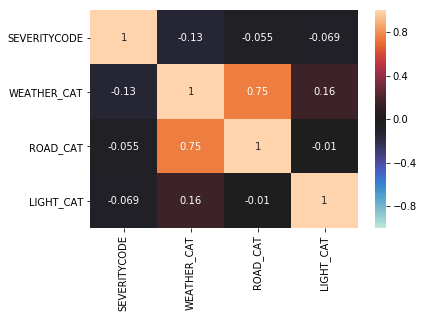

In [32]:
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [33]:
pearson_coeff, p_value = pearsonr(df_new['WEATHER_CAT'],df_new['SEVERITYCODE'])
print(pearson_coeff, p_value)

-0.12722864737795683 0.0


In [34]:
pearson_coeff, p_value = pearsonr(df_new['ROAD_CAT'],df_new['SEVERITYCODE'])
print(pearson_coeff, p_value)

-0.0552880929087244 5.969884899964722e-78


In [35]:
pearson_coeff, p_value = pearsonr(df_new['LIGHT_CAT'],df_new['SEVERITYCODE'])
print(pearson_coeff, p_value)

-0.06873262598693172 1.6122311398351827e-119


__Feature:__

In [36]:
X = np.asarray(df_new[['WEATHER_CAT', 'ROAD_CAT', 'LIGHT_CAT']]).astype(float)
y = np.asarray(df_new['SEVERITYCODE']).astype(float)
y[0:5]

array([1., 1., 1., 1., 1.])

In [37]:
X = SS().fit_transform(X)
X[0:5]

array([[ 1.1293033 ,  1.5021656 ,  0.3924198 ],
       [-0.71937457, -0.69384608,  0.3924198 ],
       [ 0.38983215, -0.69384608, -1.43202209],
       [-0.71937457, -0.69384608,  0.3924198 ],
       [-0.71937457, -0.69384608, -1.43202209]])

In [38]:
X_train,X_test,y_train,y_test = tts(X, y, test_size=0.3, random_state=45)
print("Train Set:",X_train.shape,y_train.shape)
print("Test Set:",X_test.shape,y_test.shape)

Train Set: (79872, 3) (79872,)
Test Set: (34232, 3) (34232,)


__KNN__

In [45]:
k=3
kNN_model = KNN(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [46]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([2., 1., 2., 2., 2.])

In [50]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
 kNN_model= KNN(n_neighbors=n).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)
mean_acc[n-1]=np.mean(yhat==y_test);
std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.51854989])

In [51]:
k = 5
kNN_model = KNN(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.52
KNN F1-score: 0.51


__Decision Tree__

In [53]:
DT_model = DTC(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
yhat1 = DT_model.predict(X_test)
yhat1

array([2., 2., 2., ..., 2., 2., 1.])

__Decision Tree__

In [55]:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat1))
print("DT F1-score: %.2f" % f1_score(y_test, yhat1, average='weighted') )

DT Jaccard index: 0.55
DT F1-score: 0.46


__Regression__

In [56]:
LR_model = LR(C=0.01,solver='liblinear').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
yhat2 = LR_model.predict(X_test)
yhat2

array([2., 2., 2., ..., 2., 2., 1.])

In [58]:
yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat2))
print("LR F1-score: %.2f" % f1_score(y_test, yhat2, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))

LR Jaccard index: 0.54
LR F1-score: 0.52
LR LogLoss: 0.68


In [69]:
from sklearn.metrics import jaccard_similarity_score
knn_yhat = kNN_model.predict(X_test)
jss1 = round(jaccard_similarity_score(y_test, yhat), 2)
# Decision Tree
dt_yhat = DT_model.predict(X_test)
jss2 = round(jaccard_similarity_score(y_test, yhat1), 2)
# Logistic Regression
lr_yhat = LR_model.predict(X_test)
jss3 = round(jaccard_similarity_score(y_test, yhat2), 2)

jss_list = [jss1, jss2, jss3]
jss_list

[0.52, 0.55, 0.54]

In [71]:
from sklearn.metrics import f1_score
# KNN
knn_yhat = kNN_model.predict(X_test)
f1 = round(f1_score(y_test, knn_yhat, average = 'weighted'), 2)
# Decision Tree
dt_yhat = DT_model.predict(X_test)
f2 = round(f1_score(y_test, dt_yhat, average = 'weighted'), 2)
# Logistic Regression
lr_yhat = LR_model.predict(X_test)
f3 = round(f1_score(y_test, lr_yhat, average = 'weighted'), 2)
f1_list = [f1, f2, f3]
f1_list

[0.52, 0.46, 0.52]

In [77]:
from sklearn.metrics import log_loss

# KNN
lr_prob=kNN_model.predict_proba(X_test)
l1 = round(log_loss(y_test, lr_prob), 2)

# Decision tree
lr_prob1=DT_model.predict_proba(X_test)
l2 = round(log_loss(y_test, lr_prob1), 2)

# Logistic Regression
lr_prob2 = LR_model.predict_proba(X_test)
l3 = round(log_loss(y_test, lr_prob2), 2)

ll_list = [l1,l2,l3]
ll_list

[0.94, 0.67, 0.68]

In [78]:
columns = ['KNN', 'Decision Tree', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

In [79]:
accuracy_df = pd.DataFrame([jss_list, f1_list, ll_list], index = index, columns = columns)

In [80]:
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.52,0.52,0.94
Decision Tree,0.55,0.46,0.67
Logistic Regression,0.54,0.52,0.68
